In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.optimize import curve_fit

# Individual repumps

([<matplotlib.axis.XTick at 0x12ddd7ef0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16')])

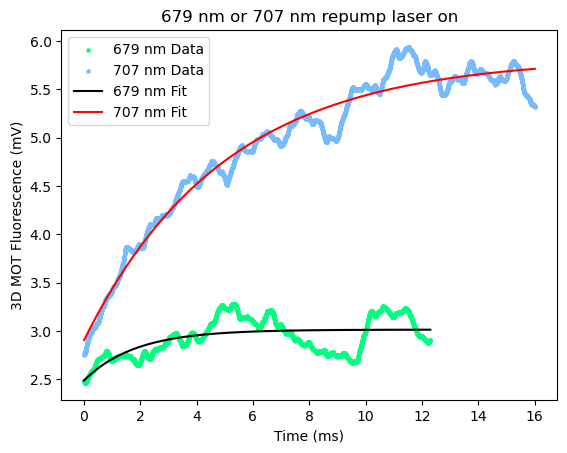

In [2]:
df_707 = pd.read_csv('707 repump load-0001.csv',skiprows=[1])

df_679 = pd.read_csv('679 repump load-0001_2.csv',skiprows=[1])
df_707.iloc[:,1] = df_707.iloc[:,1]+30
df_707.iloc[:,0] = df_707.iloc[:,0]  * 1000

df_679.iloc[:,1] = df_679.iloc[:,1]+30.1
df_679.iloc[:,0] = df_679.iloc[:,0]  * 1000
df_707 = df_707[df_707.iloc[:,0]  >= 1844]

df_707 = df_707[df_707.iloc[:,0]  <= 1862.5]


df_679 = df_679[df_679.iloc[:,0]  >= 2280.5]

df_679 = df_679[df_679.iloc[:,0]  <= 2296.5]
window_size_707 = 500
y_707 = np.convolve(df_707.iloc[:,1], np.ones(window_size_707)/window_size_707, mode='valid')

x_707 = df_707.iloc[:,0][(window_size_707-1)//2:-(window_size_707-1)//2]


window_size_679 = 600
y_679 = np.convolve(df_679.iloc[:,1], np.ones(window_size_679)/window_size_679, mode='valid')
x_679 = df_679.iloc[:,0][(window_size_679-1)//2:-(window_size_679-1)//2]



threshold_6 = 2282.7

# Use boolean indexing to filter values
filtered_indices = x_679 >= threshold_6
filtered_x_6 = x_679[filtered_indices]-2282.7
filtered_y_6 = y_679[filtered_indices]

threshold_7 = 1845.24

# Use boolean indexing to filter values
filtered_indices = x_707 >= threshold_7
filtered_x_7 = x_707[filtered_indices]-1845.24
filtered_y_7 = y_707[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * (1-np.exp(-b * x)) + c

p0=[1.12245103*10**6, 1.88006444*10**(-1), 3.25469870*10**6]

params_6, covariance_6 = curve_fit(exponential_decay,filtered_x_6 , filtered_y_6,p0, maxfev=8000)
params_7, covariance_7 = curve_fit(exponential_decay,filtered_x_7 , filtered_y_7,p0, maxfev=8000)

a_opt_6, b_opt_6, c_opt_6 = params_6
a_opt_7, b_opt_7, c_opt_7 = params_7

y_fit_6 = exponential_decay(filtered_x_6, a_opt_6, b_opt_6, c_opt_6)
y_fit_7 = exponential_decay(filtered_x_7, a_opt_7, b_opt_7, c_opt_7)

plt.scatter(filtered_x_6, filtered_y_6,s=5,alpha=1,color = "springgreen", label='679 nm Data')

plt.scatter(filtered_x_7, filtered_y_7,s=5,alpha=1,color = "xkcd:sky blue", label='707 nm Data')

tau_679 = 1/b_opt_6
tau_707 = 1/b_opt_7

# plt.plot(filtered_x_6, y_fit_6, label=r'679 nm Loading = $%.2f$ ms$^{-1}$' %b_opt_6, color='black')
# plt.plot(filtered_x_7, y_fit_7, label=r'707 nm Loading = $%.2f$ ms$^{-1}$' %b_opt_7, color='red')

plt.plot(filtered_x_6, y_fit_6, label='679 nm Fit', color='black')
plt.plot(filtered_x_7, y_fit_7, label='707 nm Fit', color='red')



plt.xlabel('Time (ms)')
plt.ylabel("3D MOT Fluorescence (mV)")
plt.title('679 nm or 707 nm repump laser on')
plt.legend()
plt.xticks(np.arange(0,18,2))

# Show the plot
# plt.show()


# Both repumps

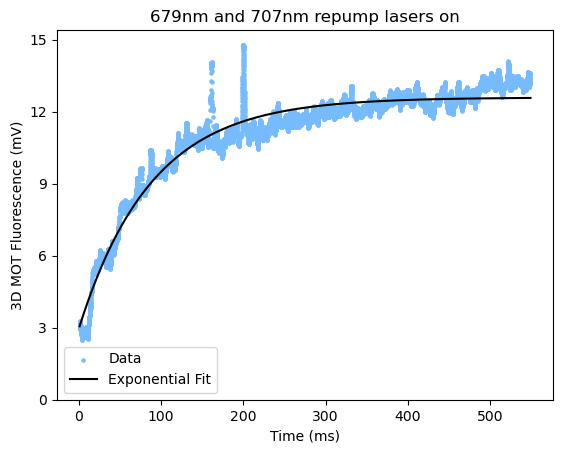

In [3]:
df = pd.read_csv('repump load-0002.csv',skiprows=[1])

df.iloc[:,1] = df.iloc[:,1]+30
df.iloc[:,0] = df.iloc[:,0]  * 1000

df = df[df.iloc[:,0]  >= 1050]

df = df[df.iloc[:,0]  <= 1600]
window_size = 500
y_new = np.convolve(df.iloc[:,1], np.ones(window_size)/window_size, mode='valid')
x = df.iloc[:,0][(window_size-1)//2:-(window_size-1)//2]

threshold = 1050

# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-1050
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * (1-np.exp(-b * x)) + c

p0=[1.31245103*10**7, 1.132006444*10**(-2), 3.95469870*10**6]

params, covariance = curve_fit(exponential_decay,filtered_x , filtered_y,p0, maxfev=8000)

a_opt, b_opt, c_opt = params

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

tau = 1/b_opt

plt.scatter(filtered_x[::10], filtered_y[::10], s=5,color = "xkcd:sky blue",label='Data')

plt.plot(filtered_x, y_fit, label='Exponential Fit', color='black')

plt.yticks(np.arange(0,18,3))
plt.xticks(np.arange(0,600,100))

plt.xlabel('Time (ms)')
plt.ylabel("3D MOT Fluorescence (mV)")
plt.title('679nm and 707nm repump lasers on')
plt.legend()

# Show the plot
# plt.show()

# Now plot both of them

In [4]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 2 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

In [5]:
a_opt_6*b_opt_6

0.28834394734869

In [12]:
def number_of_atoms(photodiode_voltage_in_mV):
    P_v = photodiode_voltage_in_mV * 1e-3 # V #Photodiode signal
    P_r = 680*10**(3) # ohm
    Respons = 0.15
    c = 299792458 #m/s
    h = 6.62607015*10**(-34)# Joule*second
    wavelength = 460.862022*10**(-9)
    f = c/wavelength# m/s
    gamma = 2*np.pi*30.41*10**(6) #The natural linewidth of the transition
    I_Isat = 0.9
    detune = -60e6 #Hz detuning of the 3D MOT beam


    P_I = P_v/P_r
    P_P = P_I/Respons
    E = h*f 
    r_p=P_P/E
    R = gamma/2*I_Isat/(1+I_Isat+4*detune**2/gamma**2)
    N_pd = r_p/R 

    r_sqre = (12.7*10**(-3)/2)**2
    d = 0.15

    A = np.pi*r_sqre
    Omega = A/d**2


    N_r = N_pd*4*np.pi/Omega

    return N_r/1e6

<>:13: SyntaxWarning: invalid escape sequence '\&'
<>:13: SyntaxWarning: invalid escape sequence '\&'
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_98218/292324446.py:13: SyntaxWarning: invalid escape sequence '\&'
  ax2.scatter(filtered_x[::10], number_of_atoms(filtered_y[::10]),color = "dodgerblue",label='679nm \& 707nm Data')


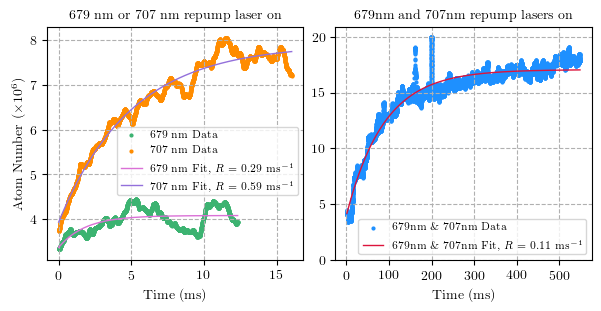

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

ax1.scatter(filtered_x_6, number_of_atoms(filtered_y_6),color = "mediumseagreen", label='679 nm Data')
ax1.scatter(filtered_x_7, number_of_atoms(filtered_y_7),color = "darkorange", label='707 nm Data')
ax1.plot(filtered_x_6, number_of_atoms(y_fit_6),  color='orchid', label=r'679 nm Fit, $R$ = %.2f ms$^{-1}$' %(a_opt_6*b_opt_6))
ax1.plot(filtered_x_7,number_of_atoms(y_fit_7), color='mediumpurple', label=r'707 nm Fit, $R$ = %.2f ms$^{-1}$' %(a_opt_7*b_opt_7))
# ax1.set_yticks(np.arange(0,18,2))
ax1.legend(bbox_to_anchor=(0.625, 0.425), loc='center')  # Custom location
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel(r"Atom Number ($\times$10$^6$)")
ax1.set_title('679 nm or 707 nm repump laser on')

ax2.scatter(filtered_x[::10], number_of_atoms(filtered_y[::10]),color = "dodgerblue",label='679nm \& 707nm Data')
ax2.plot(filtered_x, number_of_atoms(y_fit),color='crimson', label=r'679nm \& 707nm Fit, $R$ = %.2f ms$^{-1}$' %(a_opt*b_opt))
ax2.set_yticks(np.arange(0,25,5))
ax2.set_xticks(np.arange(0,600,100))
ax2.legend(loc='lower right')
# ax2.legend(bbox_to_anchor=(0.55, 0.3), loc='center')  # Custom location
ax2.set_xlabel('Time (ms)')
ax2.set_title('679nm and 707nm repump lasers on')

plt.savefig('250510 3DBlueMOTLoadingRepumpIndividualCombined.pdf', dpi=300)